In [4]:
import pandas as pd
wdi_data = pd.read_csv("../data/wdi_data_with_region.csv")

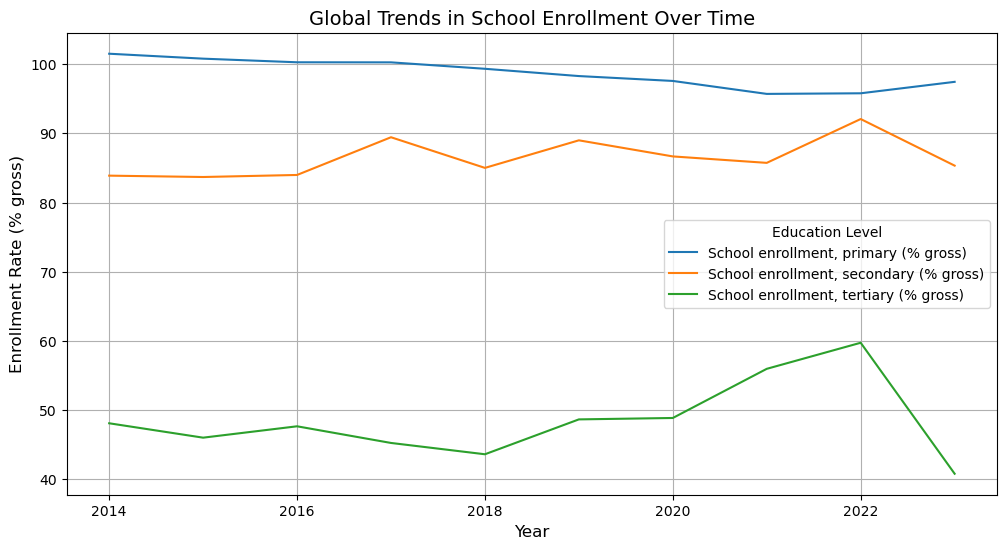

In [5]:
#1. Global Trends in School Enrollment Over Time
import matplotlib.pyplot as plt

# Extract relevant indicators for analysis

relevant_indicators = ['SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR']

filtered_data = wdi_data[wdi_data['series_code'].isin(relevant_indicators)]

# Group by year and calculate global averages for each indicator

trend_data = filtered_data.groupby(['year', 'series_name'])['value'].mean().reset_index()

# Plot trends over time

plt.figure(figsize=(12, 6))

for indicator in trend_data['series_name'].unique():
    indicator_data = trend_data[trend_data['series_name'] == indicator]
    plt.plot(indicator_data['year'], indicator_data['value'], label=indicator)

plt.title('Global Trends in School Enrollment Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Enrollment Rate (% gross)', fontsize=12)
plt.legend(title='Education Level')
plt.grid(True)
plt.show()

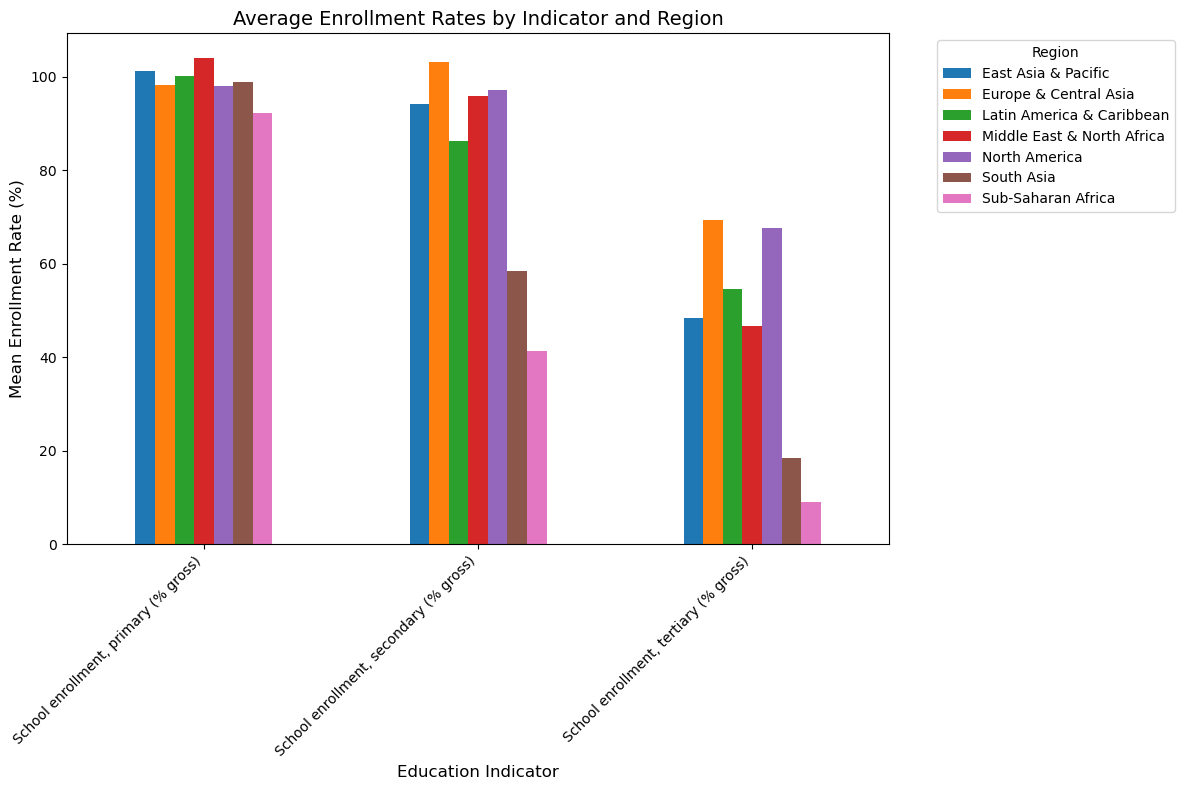

In [6]:
#2. Regional Comparison of Mean Enrollment Rates by Indicator

indicator_region_averages = wdi_data.groupby(['series_name', 'region'])['value'].mean().unstack()
indicator_region_averages.plot(kind='bar', figsize=(12, 8))
plt.title("Average Enrollment Rates by Indicator and Region", fontsize=14)
plt.xlabel("Education Indicator", fontsize=12)
plt.ylabel("Mean Enrollment Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

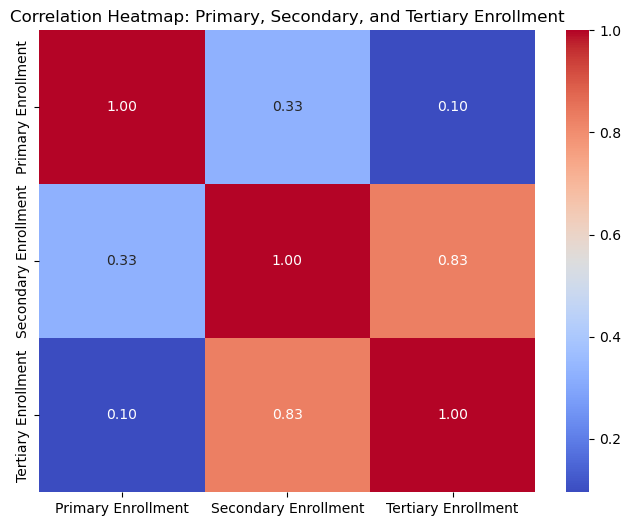

In [7]:
#3. Correlation Between Primary, Secondary and Tertiary Indictors

# Filter data to include only relevant indicators
filtered_data = wdi_data[wdi_data['series_name'].isin([
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)'
])]

# Pivot data to have indicators as columns
pivoted_data = filtered_data.pivot_table(
    index=['country_name', 'year'], 
    columns='series_name', 
    values='value'
).dropna()

# Rename columns for easier reference
pivoted_data.columns = ['Primary Enrollment', 'Secondary Enrollment', 'Tertiary Enrollment']

# Calculate Pearson correlation coefficients
correlation_matrix = pivoted_data.corr()

import seaborn as sns

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Primary, Secondary, and Tertiary Enrollment")
plt.show()